In [1]:
import pandas as pd
import uproot
#import uproot3
import numpy as np
# import track_time_calibration as ttc
from matplotlib import pyplot as plt
import sys
import os 
import fnmatch
sys.path.insert(1, r"C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\utils")
sys.path.insert(1, r"C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\tracking")
sys.path.insert(1, r"C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\muon_decay")
from track import Track
#from track3D import Track3D
from hit import Hit
from data_loading import *
from parameters import *
#from tqdm import tqdm
from track_reconstruction import plot_hits
#from physics import dist_line_rect
#import pickle
from IPython import display
from find_muon_decay_Kim_all_tracks import find_muon_decay_kim_all_tracks
#from find_muon_decay_Kim import find_muon_decay_kim


In [2]:
# Define the paths needed
raw_data_directory = r"C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\test_import_root\\" #path to the ecal data
current_directory = os.getcwd()
data_storage = current_directory+ r"\extracted_data\\"
runs = []  # List of the runs to analyse. If empty, the program will go through all the data available in the raw_data directory
suffix = "" # If one wants to re-run on already analysed data without overwriting the extracted data
separator = "\\" # "/" if linux or mac

In [3]:
# Analyse data
if len(runs) == 0:
    runs = fnmatch.filter(os.listdir(raw_data_directory), '*')

for run in runs:
    print(raw_data_directory +run)
    df_hits_total, df_hits, og_len, new_len = load_run(raw_data_directory+run+ "\\" )
    df_hits_total=df_hits_total[0:1000]
    df_hits=df_hits[0:1000]
    print(df_hits, "raw_data_directory")
    #print(df_hits[6], '\n\n')
    _ ,_ = find_muon_decay_kim_all_tracks(df_hits,df_hits_total, save_indices = True, save_time_intervals=True, save_hits = True, save_stats = True, \
                    run_name = "_"+run, storage_dir = data_storage, \
                    return_stats = False)
    
    #print(str(candidate_index)+ '\n'+ str(time_intervals)+'\n' )

    print(df_hits, '\n finish \n ')
    


C:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\test_import_root\\run_000007
selected 74.62% of all events
      evt_timestamp  evt_number  evt_flags  n_hits  \
0          40756270           0  134217728      16   
2          46243369           0  134217728      16   
3          46612617           0  134217728      15   
4          48821867           0  134217728      22   
6          64001295           0  134217728       7   
...             ...         ...        ...     ...   
1346     8015535180           0  134217728      13   
1348     8029513311           0  134217728      11   
1349     8038748820           0  134217728      16   
1350     8040010220           0  134217728      16   
1351     8041959508           0  134217728      16   

                                              tofpet_id  \
0      [0, 0, 5, 4, 1, 6, 4, 0, 5, 6, 2, 6, 2, 7, 3, 2]   
2      [0, 0, 3, 2, 4, 4, 6, 7, 5, 4, 2, 1, 0, 6, 6, 2]   
3         [0, 0, 4, 5, 6, 1, 2, 3, 4, 0, 4, 6, 6, 2

100%|██████████| 1000/1000 [00:07<00:00, 131.71it/s]


      evt_timestamp  evt_number  evt_flags  n_hits  \
0          40756270           0  134217728      16   
2          46243369           0  134217728      16   
3          46612617           0  134217728      15   
4          48821867           0  134217728      22   
6          64001295           0  134217728       7   
...             ...         ...        ...     ...   
1346     8015535180           0  134217728      13   
1348     8029513311           0  134217728      11   
1349     8038748820           0  134217728      16   
1350     8040010220           0  134217728      16   
1351     8041959508           0  134217728      16   

                                              tofpet_id  \
0      [0, 0, 5, 4, 1, 6, 4, 0, 5, 6, 2, 6, 2, 7, 3, 2]   
2      [0, 0, 3, 2, 4, 4, 6, 7, 5, 4, 2, 1, 0, 6, 6, 2]   
3         [0, 0, 4, 5, 6, 1, 2, 3, 4, 0, 4, 6, 6, 2, 2]   
4     [5, 4, 0, 2, 0, 7, 4, 2, 0, 0, 0, 5, 7, 0, 1, ...   
6                                 [1, 4, 4, 3, 4, 2, 6] 

In [4]:
# Load of the data frame to visualize the decays
run = "run_000007"

# Load the data
df_hits_total, df_hits, og_len, new_len = load_run(raw_data_directory+run+"\\")


selected 74.62% of all events


In [5]:

good_candidates = np.loadtxt(data_storage+"events_indices_"+run+".txt")

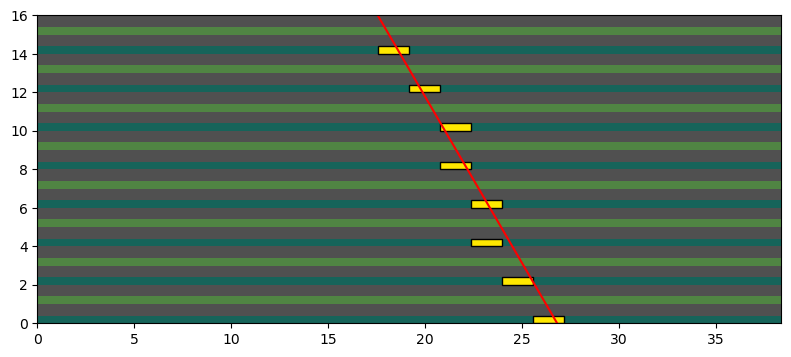

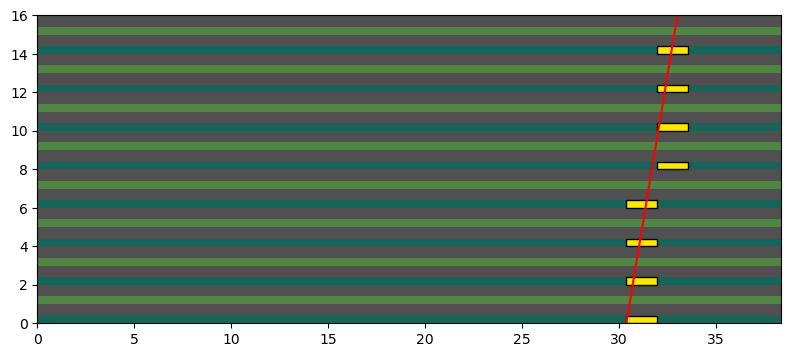

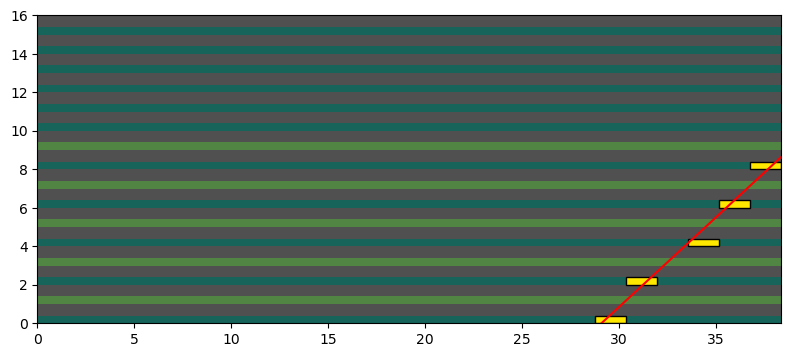

In [6]:
#This cell allows to plot the final candidates for muon decay (original track + next event)
#press enter to plot the next candidate, press and caracter + enter to stop the loop
%matplotlib inline

i = 0

kb = ""
while kb == "":
    event = df_hits.loc[good_candidates[i]]
    next_event = df_hits_total.loc[good_candidates[i]+1]

    hits = [Hit(event,i) for i in range(event['n_hits'])]
    hitsX = [h for h in hits if h.is_sidex]
    hits_next_event = [Hit(next_event,i) for i in range(next_event['n_hits'])]
    hitsX_next_event = [h for h in hits_next_event if h.is_sidex]

    track = Track(hitsX)
    fig,ax = plot_hits(hits,True,True,scaling = 0.5)#,hits_next = hits_next_event)
    z = np.linspace(0,16)
    x = track.t*z+track.x0
    ax.plot(x,z,'r-')
    display.clear_output(wait=False)
    print("i = ", i)
    print(hits_next_event[0].evt_timestamp-hits_next_event[0].timestamp-hits[-1].evt_timestamp+hits[-1].timestamp)
    fig.savefig("fig_muon_decay_problem.pdf".format(i))
    display.display(fig)
    kb = input()
    i = i+1

display.clear_output(wait=False)

In [7]:
print(data_storage+'\n')

c:\Users\kimyk\OneDrive\Bureau\Master 1\Projet_LPHE_I\ecal_reco\muon_decay\extracted_data\\



In [8]:
filtering = pd.read_pickle(data_storage+r"filtering_data_" +run)
og_len = filtering['og_len'][0]
new_len = filtering['new_len'][0]
#low_number = filtering['low_number'][0]
wrong_number = filtering['wrong_number'][0]
not_pass_through = filtering['not_pass_through'][0]
#bottom_touch = filtering['bottom_touch'][0]
side_touch = filtering['side_touch'][0]
bad_fit = filtering['bad_fit'][0]
#too_large_time_interval = filtering['too_large_time_interval'][0]
double_hit_same_z = filtering['double_hit_same_z'][0]
hits_far_from_track = filtering['hits_far_from_track'][0]

#no_spacial_correlation = filtering['no_spacial_correlation'][0]


In [9]:
# Stats on the whole set of analysed data
og_len = 0
new_len = 0
low_number = 0
bottom_touch = 0
side_touch = 0
bad_fit = 0
too_large_time_interval = 0
hits_far_from_track = 0
no_spacial_correlation = 0

n_good_candidates = 0

runs = fnmatch.filter(os.listdir(raw_data_directory), '*')
for run in runs:
    time_intervals = np.loadtxt(data_storage+"events_indices_"+run+".txt")
    n_good_candidates += len(time_intervals)

    filtering = pd.read_pickle(data_storage+"filtering_data"+"_"+run)
    og_len += filtering['og_len'][0]
    new_len += filtering['new_len'][0]
    #low_number += filtering['low_number'][0]
    #bottom_touch += filtering['bottom_touch'][0]
    side_touch += filtering['side_touch'][0]
    bad_fit += filtering['bad_fit'][0]
    #too_large_time_interval += filtering['too_large_time_interval'][0]
    hits_far_from_track += filtering['hits_far_from_track'][0]
    no_spacial_correlation += filtering['no_spacial_correlation'][0]



KeyError: 'no_spacial_correlation'

In [ ]:
# Showcase of the numbers of rejection at each step of the filtering 
print("original length : ", og_len)
print("n_hits between 6 and 50 : ", new_len)
n = new_len
print("\u2937 Too low number of hits in one plane : ", low_number, " over ", n)
n -= low_number
print(" \u2937 Last layer touched : \t\t", bottom_touch, " over ", n)
n -= bottom_touch
print("  \u2937 Possible side exit : \t\t", side_touch, " over ", n)
n -= side_touch
print("   \u2937 Bad fit : \t\t\t\t", bad_fit, " over ", n)
n -= bad_fit
print("    \u2937 Too large time interval : \t", too_large_time_interval, " over ", n)
n -= too_large_time_interval
print("     \u2937 Hits far from track : \t\t", hits_far_from_track, " over ", n)
n -= hits_far_from_track
print("      \u2937 No spacial correlation : \t", no_spacial_correlation, " over ", n)
print("Final number : ", n_good_candidates)

original length :  1000
n_hits between 6 and 50 :  1000
⤷ Too low number of hits in one plane :  0  over  1000
 ⤷ Last layer touched : 		 0  over  1000
  ⤷ Possible side exit : 		 0  over  1000
   ⤷ Bad fit : 				 0  over  1000
    ⤷ Too large time interval : 	 0  over  1000
     ⤷ Hits far from track : 		 0  over  1000
      ⤷ No spacial correlation : 	 0  over  1000
Final number :  172


In [ ]:
run = "run_000007"

# Load the data
df_hits_total, df_hits, og_len, new_len = load_run(raw_data_directory+run+"\\")

selected 74.62% of all events
